<a href="https://colab.research.google.com/github/UKD1211/100_days_ML_cX_ISI_DS/blob/main/Practice_Projects/Medical_insurance_cost_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.sample(10)


,age,sex,bmi,children,smoker,region,charges
357,47,male,29.830,3,no,northwest,9620.33070
871,26,female,29.480,1,no,southeast,3392.36520
208,63,female,31.800,0,no,southwest,13880.94900
1164,41,female,28.310,1,no,northwest,7153.55390
449,35,male,38.600,1,no,southwest,4762.32900
509,57,female,28.700,0,no,southwest,11455.28000
22,18,male,34.100,0,no,southeast,1137.01100
733,48,female,27.265,1,no,northeast,9447.25035
661,57,female,23.980,1,no,southeast,22192.43711
933,45,female,35.300,0,no,southwest,7348.14200


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print(df['sex'].value_counts())
print(df['children'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


/tmp/ipython-input-1108686981.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


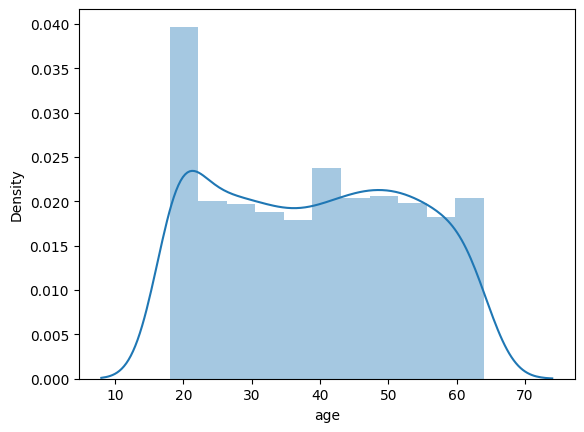

In [ ]:
# AGE
sns.distplot(df['age'])
plt.show()

<Axes: xlabel='age', ylabel='bmi'>

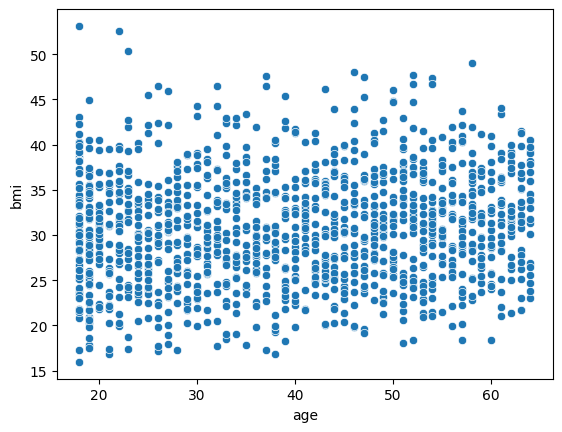

In [ ]:
sns.scatterplot(x = df['age'],y=df['bmi'])

In [ ]:
df['age'].corr(df['bmi'])

np.float64(0.1092718815485352)

In [ ]:
df['age']

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [ ]:
df['age'].corr(df['charges'])

np.float64(0.29900819333064754)

<Axes: xlabel='age', ylabel='charges'>

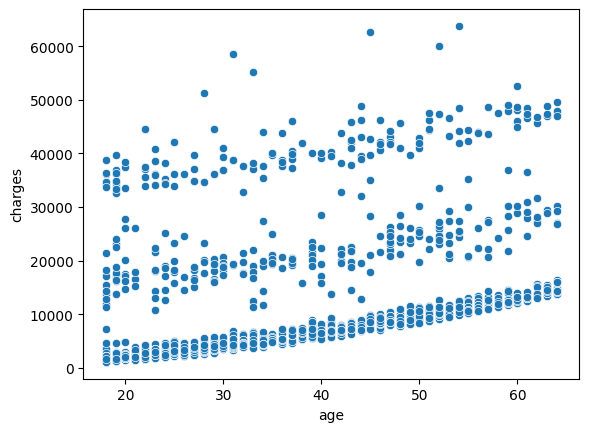

In [ ]:
sns.scatterplot(x = df['age'],y=df['charges'])

<Axes: ylabel='age'>

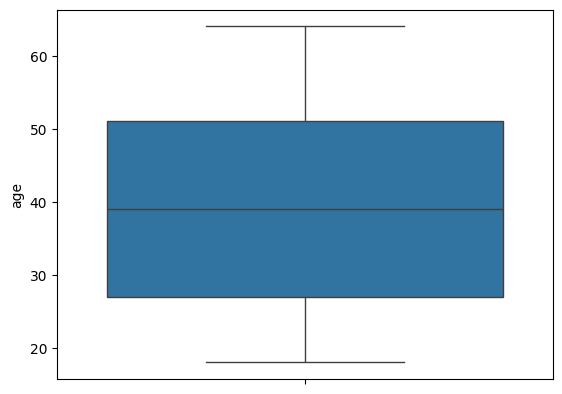

In [ ]:
sns.boxplot(df['age'])

# Age is a valid, well-behaved continuous predictor with an approximately linear relationship to charges; it requires no transformation or scaling, but its effect is likely conditional on subgroup variables (e.g., smoker status).

<Axes: xlabel='sex', ylabel='count'>

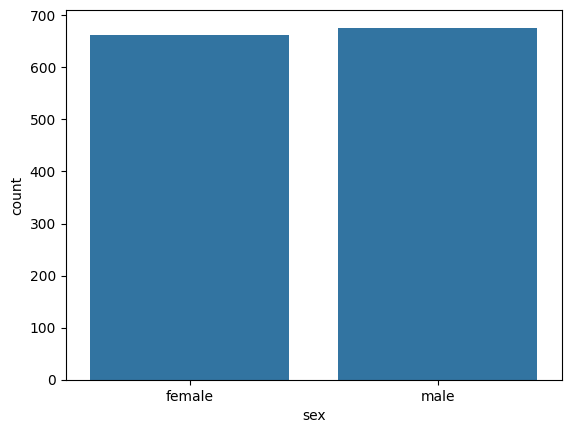

In [ ]:
# SEX
sns.countplot(x='sex', data=df)

In [ ]:
df.groupby('sex')['charges'].mean()

,charges
sex,
female,12569.578844
male,13956.751178


<Axes: xlabel='sex', ylabel='charges'>

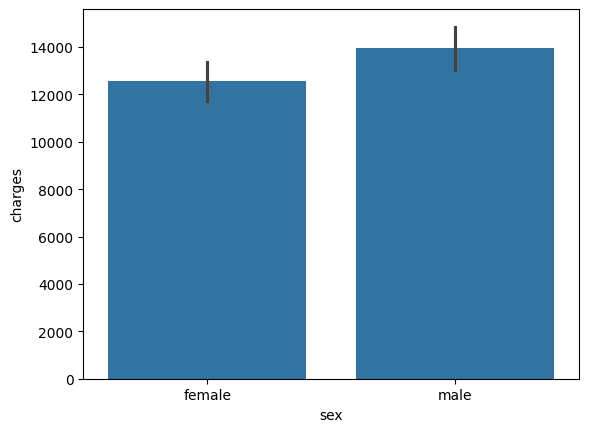

In [ ]:
sns.barplot(x='sex', y='charges', data=df)

In [ ]:
df.groupby('sex')['bmi'].mean()

,bmi
sex,
female,30.377749
male,30.943129


# Sex: binary categorical variable with balanced classes; shows a small difference in mean charges and requires only OHE later, no further preprocessing.

In [ ]:
#BMI = body mass index

/tmp/ipython-input-4168411822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

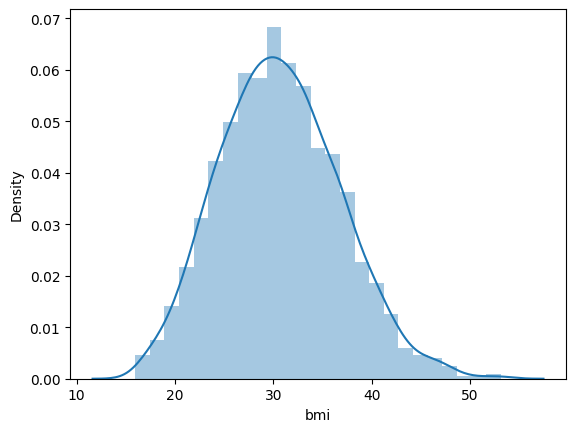

In [ ]:
sns.distplot(df['bmi'])

In [ ]:
df['bmi'].mean()

np.float64(30.66339686098655)

In [ ]:
df['bmi'].corr(df['charges'])

np.float64(0.19834096883362895)

<Axes: xlabel='bmi', ylabel='charges'>

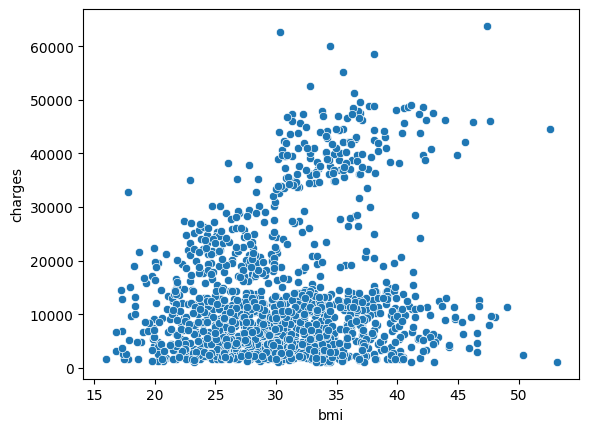

In [ ]:
sns.scatterplot(x = df['bmi'],y = df['charges'])

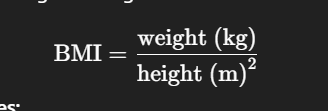

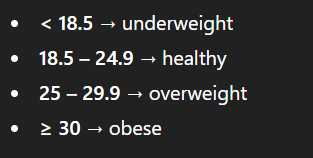  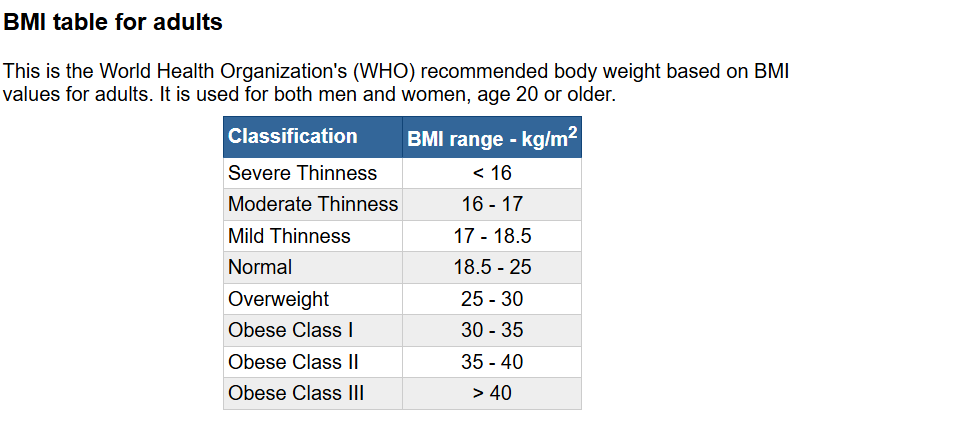

In [ ]:
df[df['bmi'] >= 30].shape[0]/df.shape[0]*100

52.84005979073244

# Approximately 53% of individuals in the insurance dataset have BMI ≥ 30, indicating a strong overrepresentation of high-risk individuals, consistent with the cost-focused nature of the data rather than population prevalence.

In [ ]:
obese_mean = df[df['bmi'] >= 30]['charges'].mean()
underweight_mean = df[df['bmi'] < 18.5]['charges'].mean()
healty_mean = df[(df['bmi'] >= 18.5 ) & (df['bmi'] <= 24.9)]['charges'].mean()
overweight_mean = df[(df['bmi'] >= 25) & (df['bmi'] <= 29.9)]['charges'].mean()
print(obese_mean, underweight_mean, healty_mean, overweight_mean)

15552.335468868458 8852.200585 10379.499732162161 10993.994037132627


In [ ]:
df['charges'].mean()

np.float64(13270.422265141257)

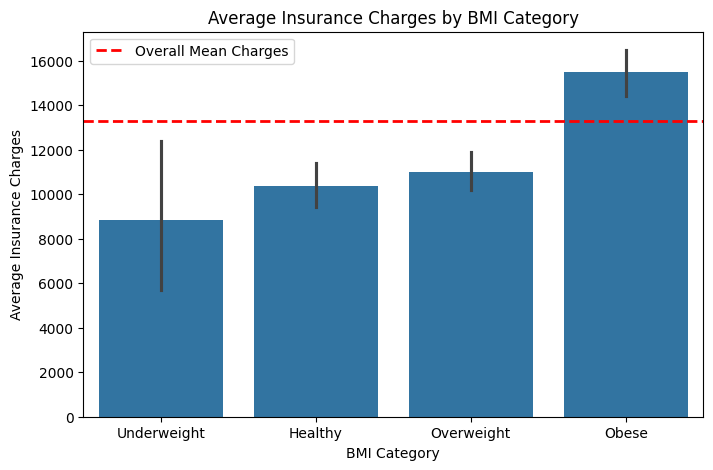

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create BMI categories
def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Healthy'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(get_bmi_category)

# Set the order for the categories in the plot
bmi_order = ['Underweight', 'Healthy', 'Overweight', 'Obese']
df['bmi_category'] = pd.Categorical(df['bmi_category'], categories=bmi_order, ordered=True)

# overall mean
mean_charges = df['charges'].mean()

plt.figure(figsize=(8,5))
ax = sns.barplot(x='bmi_category', y='charges', data=df, estimator='mean')

# horizontal mean line
ax.axhline(mean_charges, linestyle='--', linewidth=2, label='Overall Mean Charges',color='red')

plt.xlabel('BMI Category')
plt.ylabel('Average Insurance Charges')
plt.title('Average Insurance Charges by BMI Category')
plt.legend()
plt.show()


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


# BMI is a strong risk proxy: average insurance charges increase monotonically with BMI, with individuals in the obese range (BMI ≥ 30) incurring charges well above the overall mean; due to large sample size, obese-group estimates are stable, and BMI should be retained as a continuous predictor without categorization in the regression model.

In [ ]:
#CHILDREN
df['children']

,children
0,0
1,1
2,3
3,0
4,0
...,...
1333,3
1334,0
1335,0
1336,0


<Axes: xlabel='children'>

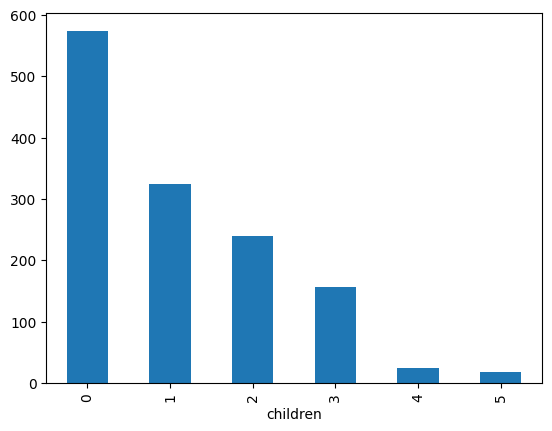

In [ ]:
df['children'].value_counts().plot(kind = 'bar')

In [ ]:
df.groupby('children')['charges'].mean()

,charges
children,
0,12365.975602
1,12731.171832
2,15073.563734
3,15355.318367
4,13850.656311
5,8786.035247


In [ ]:
df.groupby('children')['bmi'].mean()

,bmi
children,
0,30.550296
1,30.623148
2,30.978104
3,30.684331
4,31.391200
5,29.605000


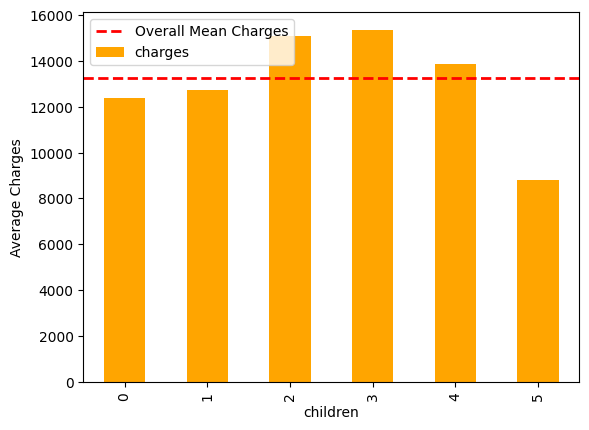

In [ ]:
ax = df.groupby('children')['charges'].mean().plot(kind='bar',color = 'orange')
mean_charges = df['charges'].mean()
ax.axhline(mean_charges, linestyle='--', linewidth=2, label='Overall Mean Charges',color='red')
ax.set_ylabel('Average Charges')
ax.legend()
plt.show()

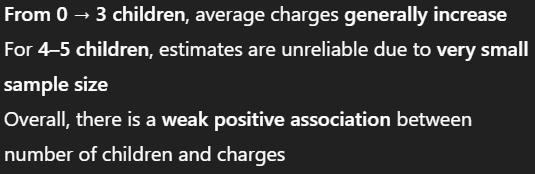

In [ ]:
#SMOKER

In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


<Axes: xlabel='smoker'>

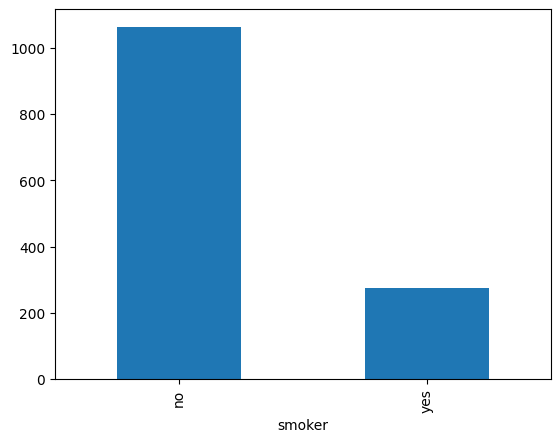

In [ ]:
df['smoker'].value_counts().plot(kind = 'bar')

In [ ]:
df.groupby('smoker')['charges'].mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


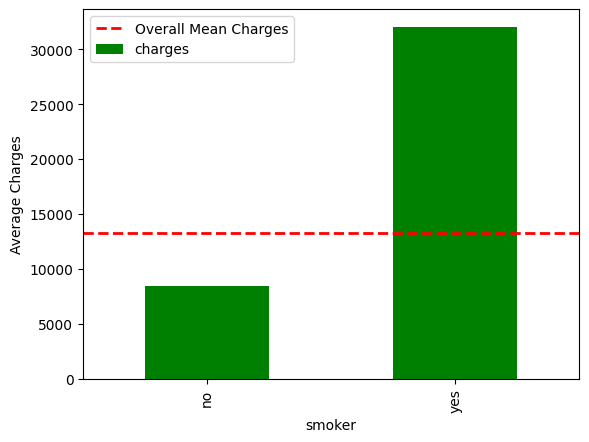

In [ ]:
gx = df.groupby('smoker')['charges'].mean().plot(kind = 'bar',color = 'green')
mean_charges = df['charges'].mean()
gx.axhline(mean_charges, linestyle='--', linewidth=2, label='Overall Mean Charges',color='red')
gx.set_ylabel('Average Charges')
gx.legend()
plt.show()

In [ ]:
df.groupby('smoker')['bmi'].mean()

,bmi
smoker,
no,30.651795
yes,30.708449


<Axes: xlabel='bmi', ylabel='charges'>

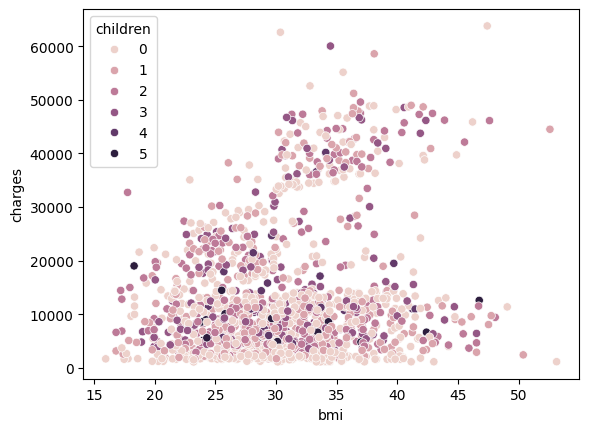

In [ ]:
sns.scatterplot(x = df['bmi'],y = df['charges'],hue = df['children'])

<Axes: xlabel='bmi', ylabel='charges'>

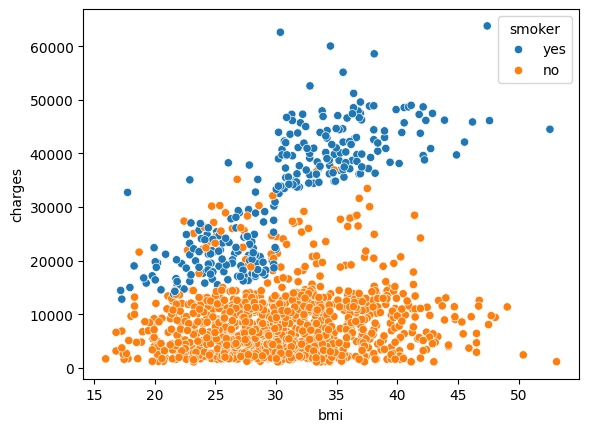

In [ ]:
sns.scatterplot(x = df['bmi'],y = df['charges'],hue = df['smoker'])

<Axes: xlabel='age', ylabel='charges'>

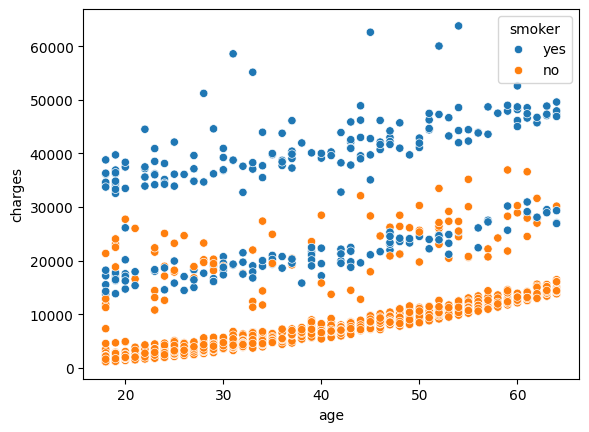

In [ ]:
sns.scatterplot(x = df['age'],y = df['charges'],hue = df['smoker'])

<Axes: xlabel='age', ylabel='charges'>

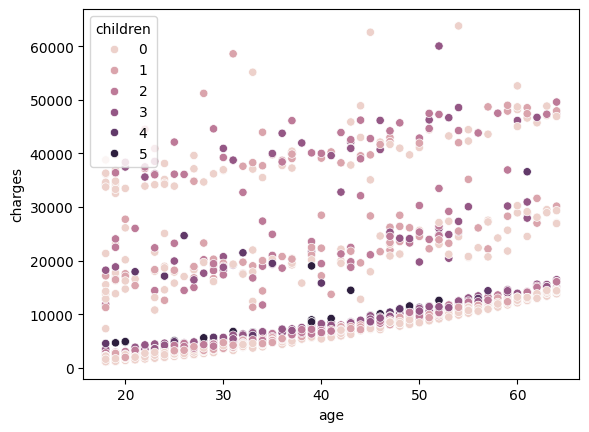

In [ ]:
sns.scatterplot(x = df['age'],y = df['charges'],hue = df['children'])

# Smoking status is the strongest predictor of insurance charges, producing a large upward shift in baseline costs across all ages and BMI levels; smokers consistently incur substantially higher charges than non-smokers, making smoker an essential main effect in the regression model, while interaction effects can be evaluated during modeling.

In [ ]:
#REGION
df['region']

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Axes: xlabel='region'>

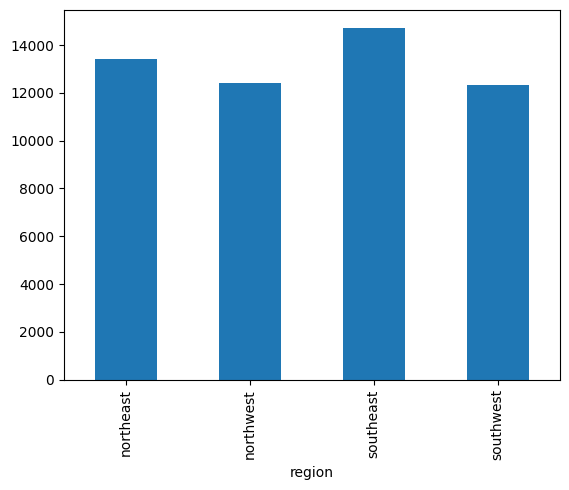

In [ ]:
df.groupby('region')['charges'].mean().plot(kind='bar')

<Axes: xlabel='region'>

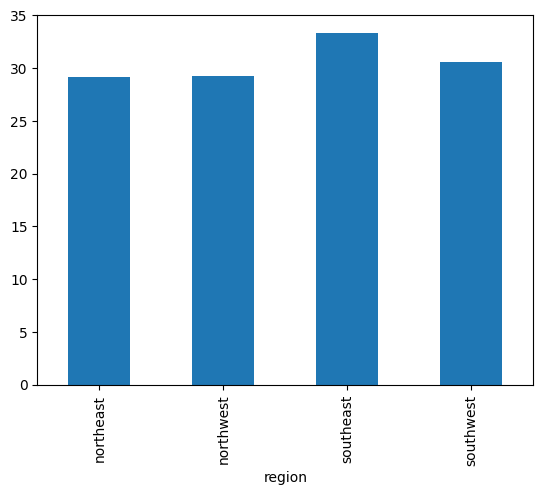

In [ ]:
df.groupby('region')['bmi'].mean().plot(kind='bar')

In [ ]:
df.groupby('region')['bmi'].mean()

,bmi
region,
northeast,29.173503
northwest,29.199785
southeast,33.355989
southwest,30.596615


<Axes: xlabel='region,smoker'>

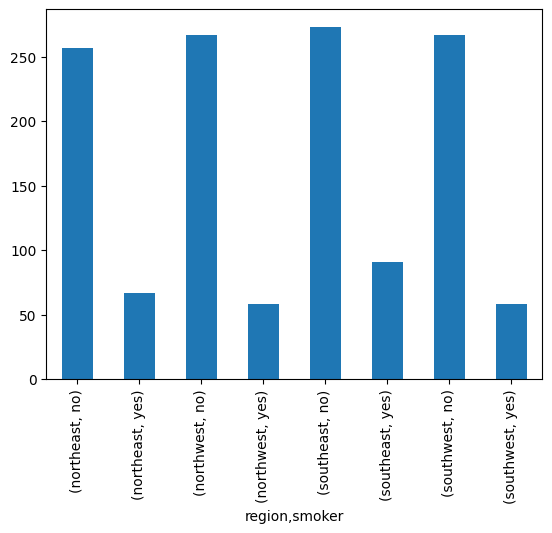

In [ ]:
df.groupby('region')['smoker'].value_counts().plot(kind='bar')

# The southeast region exhibits higher average insurance charges, which is largely explained by a higher prevalence of smoking and elevated BMI among individuals in that region rather than an independent regional effect; thus, region serves as a contextual control variable rather than a primary cost driver.

In [ ]:
df = df.drop(columns = 'bmi_category')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
cat_cols = ['sex','smoker','region']
trf1 = ColumnTransformer([
    ('ohe_sex_smoker_region',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),cat_cols)
],remainder = 'passthrough')

In [ ]:
X = df.drop(columns = ['charges'])
y = df['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
X_train.shape

(1070, 6)

In [ ]:
y_train.shape

(1070,)

In [ ]:
X_train_modified = trf1.fit_transform(X_train)
X_test_modified = trf1.transform(X_test)

In [ ]:
X_train_modified.shape

(1070, 8)

In [ ]:
X_train_modified

array([[ 0.   ,  0.   ,  1.   , ..., 46.   , 19.95 ,  2.   ],
       [ 0.   ,  0.   ,  0.   , ..., 47.   , 24.32 ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ..., 52.   , 24.86 ,  0.   ],
       ...,
       [ 1.   ,  0.   ,  0.   , ..., 58.   , 25.175,  0.   ],
       [ 0.   ,  1.   ,  0.   , ..., 37.   , 47.6  ,  2.   ],
       [ 1.   ,  0.   ,  0.   , ..., 55.   , 29.9  ,  0.   ]])

In [ ]:
# Imp to get the column names
feature_names = trf1.get_feature_names_out()

In [ ]:
feature_names

array(['ohe_sex_smoker_region__sex_male',
       'ohe_sex_smoker_region__smoker_yes',
       'ohe_sex_smoker_region__region_northwest',
       'ohe_sex_smoker_region__region_southeast',
       'ohe_sex_smoker_region__region_southwest', 'remainder__age',
       'remainder__bmi', 'remainder__children'], dtype=object)

In [ ]:
X_train = pd.DataFrame(X_train_modified,columns = feature_names)
X_test = pd.DataFrame(X_test_modified,columns = feature_names)

In [ ]:
X_train

,ohe_sex_smoker_region__sex_male,ohe_sex_smoker_region__smoker_yes,ohe_sex_smoker_region__region_northwest,ohe_sex_smoker_region__region_southeast,ohe_sex_smoker_region__region_southwest,remainder__age,remainder__bmi,remainder__children
0,0.0,0.0,1.0,0.0,0.0,46.0,19.950,2.0
1,0.0,0.0,0.0,0.0,0.0,47.0,24.320,0.0
2,0.0,0.0,0.0,1.0,0.0,52.0,24.860,0.0
3,0.0,0.0,0.0,1.0,0.0,39.0,34.320,5.0
4,0.0,0.0,1.0,0.0,0.0,54.0,21.470,3.0
...,...,...,...,...,...,...,...,...
1065,0.0,0.0,0.0,0.0,0.0,18.0,31.350,4.0
1066,0.0,0.0,0.0,1.0,0.0,39.0,23.870,5.0
1067,1.0,0.0,0.0,0.0,0.0,58.0,25.175,0.0
1068,0.0,1.0,0.0,0.0,1.0,37.0,47.600,2.0


In [ ]:
X_test

,ohe_sex_smoker_region__sex_male,ohe_sex_smoker_region__smoker_yes,ohe_sex_smoker_region__region_northwest,ohe_sex_smoker_region__region_southeast,ohe_sex_smoker_region__region_southwest,remainder__age,remainder__bmi,remainder__children
0,0.0,0.0,0.0,0.0,0.0,45.0,25.175,2.0
1,0.0,0.0,1.0,0.0,0.0,36.0,30.020,0.0
2,0.0,1.0,1.0,0.0,0.0,64.0,26.885,0.0
3,1.0,0.0,1.0,0.0,0.0,46.0,25.745,3.0
4,1.0,1.0,1.0,0.0,0.0,19.0,31.920,0.0
...,...,...,...,...,...,...,...,...
263,1.0,1.0,0.0,1.0,0.0,63.0,35.090,0.0
264,0.0,0.0,1.0,0.0,0.0,58.0,27.170,0.0
265,1.0,0.0,0.0,0.0,0.0,38.0,28.025,1.0
266,0.0,1.0,0.0,1.0,0.0,54.0,47.410,0.0


In [ ]:
y_test.shape

(268,)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
lr.intercept_

np.float64(-11931.219050326445)

In [ ]:
lr.coef_

array([-1.85916916e+01,  2.36511289e+04, -3.70677326e+02, -6.57864297e+02,
       -8.09799354e+02,  2.56975706e+02,  3.37092552e+02,  4.25278784e+02])

In [ ]:
r2_score(y_test,y_pred)

0.7835929767120722

In [ ]:
#how can i Improve this ?

In [ ]:
# VIF-> for multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X_vif  = X_train.copy()
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [
    vif(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_data

,feature,VIF
0,ohe_sex_smoker_region__sex_male,2.015454
1,ohe_sex_smoker_region__smoker_yes,1.259327
2,ohe_sex_smoker_region__region_northwest,1.876922
3,ohe_sex_smoker_region__region_southeast,2.189733
4,ohe_sex_smoker_region__region_southwest,1.965852
5,remainder__age,7.848186
6,remainder__bmi,11.226908
7,remainder__children,1.812358


In [ ]:
#i am keeping the BMI , as its imp in this model , rather there is no meaning here, i am doing the prediction , not inferering , so multicollinearity do not bothers

In [ ]:
import statsmodels.api as sm
X_sm = sm.add_constant(X_train)

y_sm = y_train.reset_index(drop=True)


In [ ]:
ols_model = sm.OLS(y_sm, X_sm).fit()

In [ ]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sun, 18 Jan 2026   Prob (F-statistic):          1.32e-305
Time:                        21:18:20   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
#here we are gettimg a multicollinearity issue
# Multicollinearity does not interfere with prediction accuracy or R² in OLS.

In [ ]:
error = y_test - y_pred

<Axes: xlabel='charges', ylabel='Density'>

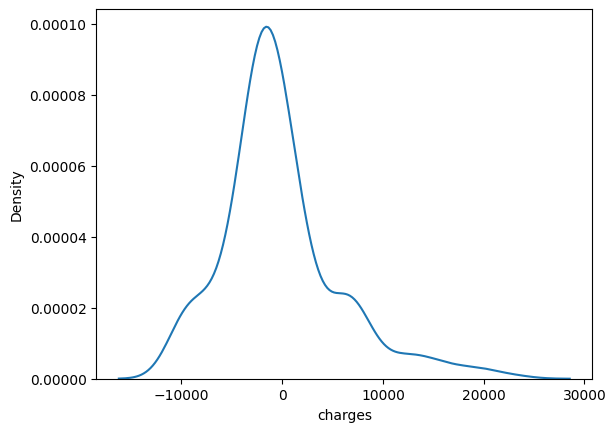

In [ ]:
sns.kdeplot(error)

In [ ]:
from sklearn.model_selection import GridSearchCV
rr = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid = GridSearchCV(
    estimator = rr,
    param_grid = param_grid,
    scoring="r2",
    cv=5
)

grid.fit(X_train, y_train)


best_ridge = grid.best_estimator_

grid.best_params_

{'alpha': 1}

In [ ]:
y_pred_ridge = best_ridge.predict(X_test)

r2_score(y_test, y_pred_ridge)

0.7832830144988214

In [ ]:
rr1 = Ridge(alpha = 1)

In [ ]:
rr1.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
r2_score(y_test,rr1.predict(X_test))

0.7832830144988214

In [ ]:
lasso = Lasso(alpha = 0.1)

In [ ]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
r2_score(y_test,lasso.predict(X_test))

0.7835874642295179

/tmp/ipython-input-2535575450.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


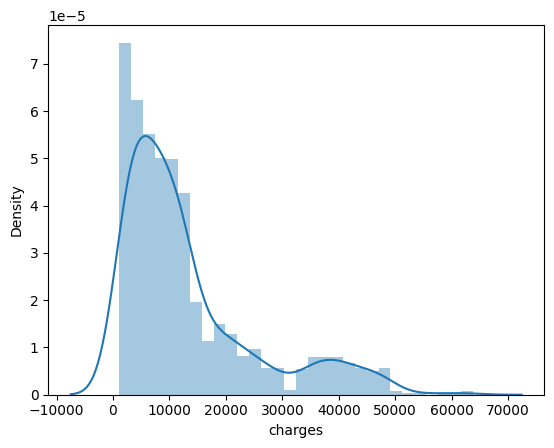

In [ ]:
sns.distplot(df['charges'])
plt.show()

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
ft = FunctionTransformer(np.log1p)

In [ ]:
y_train_modified = ft.fit_transform(y_train.values.reshape(-1, 1))
y_test_modified = ft.transform(y_test.values.reshape(-1, 1))

<Axes: ylabel='Density'>

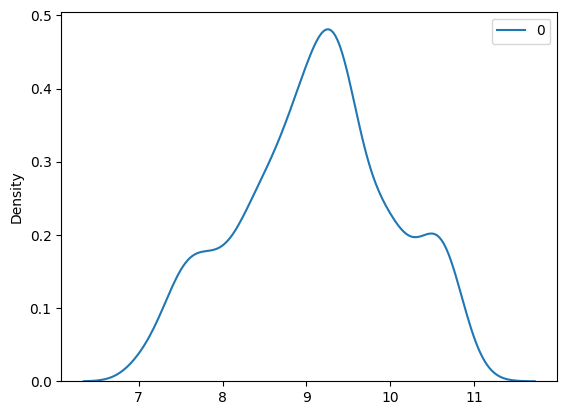

In [ ]:
sns.kdeplot(y_train_modified)

In [ ]:
rr2 = Ridge(alpha = 1)

In [ ]:
rr2.fit(X_train,y_train_modified)

Ridge(alpha=1)

In [ ]:
#best score by me
r2_score(y_test_modified,rr2.predict(X_test))

0.8046354828541403

# **The final step improved accuracy by applying a log transformation to the target variable (insurance charges), which reduced the dominance of extremely high bills, stabilized variance, and allowed the model to learn more balanced patterns; Ridge regularization then further stabilized th:e weights, resulting in better generalization and higher R².**  💡





# ***For CV pov revise***

# 📌 **Medical Insurance Cost Prediction (Linear Regression)**

Conducted end-to-end EDA on medical insurance data, analyzing demographic and
lifestyle factors (age, BMI, smoking status, region, dependents) and identifying key risk drivers of insurance charges.

Built and validated an OLS linear regression model, achieving ~78% R², with careful handling of categorical variables using ColumnTransformer + OneHotEncoder.

Identified and analyzed moderate multicollinearity using VIF and condition number diagnostics, and retained domain-critical features (BMI, age, smoker) with appropriate interpretational caution.

Used statsmodels OLS for full statistical inference, interpreting coefficients, p-values, confidence intervals, and diagnostic statistics.

Improved model performance by applying log transformation to the target variable, reducing skewness and heteroscedasticity, leading to a final R² ≈ 80.5%.

Applied Ridge regression with GridSearchCV to assess overfitting and coefficient stability, confirming strong generalization and minimal variance issues.

Demonstrated clear separation between prediction vs inference goals, selecting modeling techniques aligned with business interpretability.

Performed residual diagnostics to validate key linear regression assumptions and ensured robust model behavior.

Delivered a fully interpretable, production-ready linear model with documented assumptions, limitations, and improvement pathways.